In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')



<img src="./images/SING_Banner.png" width=600px/> 

<h1 align='center'>Introduction to Bioinformatics</h1>


<h2 align='center'>Introduction</h2>

Bioinformatics is an area of study dedicated to handling
genetic information. Bioinformatics involves research,
development, or application of computational tools and
approaches to acquire, store, visualize, and interpret medical
or biological data.


In this notebook, participants will have an opportunity to learn about basics of bioinformatics analysis. 

---

<h2 align='center'>Background</h2>

Let us start with a few basic definitions and build our way up to more complex concepts. 

<div class="alert alert-warning">
<font color="black"><b>Definition.</b> A **sequence** is a string of letters. 
  </font>
</div>

By string, we just mean one letter after another. 

<div class="alert alert-warning">
<font color="black"><b>Definition.</b> A **DNA sequence** is a sequence formed by letters A,C,T,G.
  </font>
</div>


Recall that a nucelotide is an organic molecule that serve as the monomer units for forming the nucleic acid polymers deoxyribonucleic acid (DNA) and ribonucleic acid (RNA), both of which are essential biomolecules within all life-forms on Earth.

The nucleic acid notation currently in use was first formalized by the International Union of Pure and Applied Chemistry (IUPAC) in 1970.

This universally accepted notation uses the Roman characters G, C, A, and T, to represent the four nucleotides commonly found in deoxyribonucleic acids (DNA).

This is a DNA sequence


$$A\text{ }C\text{ }G\text{ }G\text{ }G\text{ }C\text{ }C\text{ }C\text{ }G\text{ }C\text{ }G\text{ }C\text{ }G\text{ }G\text{ }G\text{ }T\text{ }T\text{ }T$$

So is this


$$C\text{ }C\text{ }C\text{ }G\text{ }G\text{ }T\text{ }T\text{ }A\text{ }G\text{ }G\text{ }G\text{ }A\text{ }G\text{ }A\text{ }G\text{ }G\text{ }G\text{ }C$$



<div class="alert alert-warning">
<font color="black"><b>Definition.</b> The **length** of a sequence is the number of letters its made of.
  </font>
</div>

From our previous example, 

$$A\text{ }C\text{ }G\text{ }G\text{ }G\text{ }C\text{ }C\text{ }C\text{ }G\text{ }C\text{ }G\text{ }C\text{ }G\text{ }G\text{ }G\text{ }T\text{ }T\text{ }T$$

has length 13

$$C\text{ }C\text{ }C\text{ }G\text{ }G\text{ }T\text{ }T\text{ }A\text{ }G\text{ }G\text{ }G\text{ }A\text{ }G\text{ }A\text{ }G\text{ }G\text{ }G\text{ }C$$

also has length 13.



---


<h2 align='center'>Sequence Alignment</h2>

<div class="alert alert-warning">
<font color="black"><b>Definition.</b> A **DNA sequence alignment** is a method to arrange at least two DNA sequences, with the purpose of identifying regions of similarity or dissimilarity. 
  </font>
</div>

<h3 align='center'>Why do we care about finding regions of similarity or dissimilarity between two or more given DNA sequences?</h3>

Regions of similarity and dissimilarity carry information on the functional, structural or evolutionary relationships between the sequences.

Given two DNA sequences, say,

$$S_1:= ACGTTGGCCACCC$$

$$S_2:= GTGTGGGGACCCC$$

how can we determine the existing regions of similarity to establish hypothesis on functional, structural or evolutionary relationships between them? 

In simple terms, how do we measure how 'similar' they are? 

We can begin by fixing one of the two sequences, say $S_1$ and "stacking" $S_2$ underneath it so that there is a one to one correspondence between each nucleotide in the sequences.

$$A\text{ }C\text{ }G\text{ }T\text{ }T\text{ }G\text{ }G\text{ }C\text{ }C\text{ }A\text{ }C\text{ }C\text{ }C$$
$$\text{ }\mid \text{ }\text{ }\mid \text{ }\mid \text{ }\mid \text{ }\mid \text{ }\mid \text{ }\mid \text{ }\mid \text{ }\mid \text{ }\mid \text{ }\mid \text{ }\mid \text{ }$$
$$G\text{ }T\text{ }G\text{ }T\text{ }G\text{ }G\text{ }G\text{ }G\text{ }A\text{ }C\text{ }C\text{ }C\text{ }C$$

The widget below is designed to demonstrate the process of comparing two sequences this way. 

Use the slider to set what position within the alignment you wish to compare. 

In [2]:
# Import libraires
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ipywidgets import widgets
from ipywidgets import Button, Layout,interact_manual,interact
from IPython.display import display, Javascript, Markdown
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import widgets as w
from ipywidgets import Button, Layout
from IPython.display import display, Javascript, Markdown

In [3]:
from ipywidgets import Button , Layout , interact,widgets
from IPython.display import Javascript, display

# Function: executes previous cell on button widget click event and hides achievement indicators message

def run_current(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+0,IPython.notebook.get_selected_index()+1)'))    

In [4]:
import matplotlib.pyplot as plt

def demo_seq(value):
    fig = plt.figure(figsize=(16,5))
    S1 = "ACGTTGGCCACCC"
    S2 = "GTGTGGGGACCCC"
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    ax1.set_title("Sequence Name",fontsize=30)
    ax2.set_title("DNA Sequence",fontsize=30)
    ax1.set_xticklabels([]),ax1.set_yticklabels([])
    ax2.set_xticklabels([]),ax2.set_yticklabels([])
    ax3.set_xticklabels([]),ax3.set_yticklabels([])
    ax1.axis("Off"),ax2.axis("Off"),ax3.axis("Off")
    
    for i in range(len(S1)):
        ax2.text(i/10,0.8,S1[i],fontsize=30)
        ax2.text(i/10,0.7,"|",fontsize=30)
        ax2.text(i/10,0.6,S2[i] ,fontsize=30)

    ax1.text(0.4,0.8,"S1",fontsize=30)
    ax1.text(0.4,0.6,"S2" ,fontsize=30)
    
    ax2.text(value/10,0.8,S1[value],fontsize=30,color='red')
    ax2.text(value/10,0.6,S2[value],fontsize=30,color='red')
    
    if S1[value]==S2[value]:
        ax3.text(0.5,0.65,"Perfect\nmatch",fontsize=30)
    else:
        ax3.text(0.5,0.65,"Bases\ndiffer",fontsize=30)

    plt.show()
style = {'description_width': 'initial'}    
interact(demo_seq,value=widgets.IntSlider(value=0,
            min=0,
            max=12,
            step=1,
            description='Position in alignment',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
));

interactive(children=(IntSlider(value=0, continuous_update=False, description='Position in alignment', max=12, style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

In this case it was easy comparing the sequences base by base on a column-basis, as the lengths were equal. In reality, bioinformaticians work with DNA sequences of differing lengths. 

Furthermore, DNA sequences do not remain fixed over time.

This leads us to the next section.

---

<h3 align='center'>Mutation Events</h3>

Over the course of biological evolution (in real time as a matter of fact) DNA sequence changes, mostly due **mutations**. We can classify the different types of mutation events as follows:

$\bullet$ **Substitutions**: in this case one base (or amino acid if we are working with a protein sequence) is replaced with another base (respectively, another amino acid). 

$\bullet$ **Insertions**: in this case, one or more contiguous bases (amino acid) are inserted into a sequence. We denote insertions with a symbol "-". 

$\bullet$ **Deletions**: in this case, one or more contigous bases (amino acids) are deleted from a sequence. We denote deletions with the symbol "-".


<h3 align='center'>Abbreviation Keys For Mutation Events</h3>

The abbreviation key for $-$ is "indel", which stands for *insertion* or *deletion* events that have occurred since the last common ancestor. 

The abbreviation key for a *substitution*  event that occurred since the last common ancestor is "sub". 

Similarly, to indicate that no change has taken place, the abbreviation key "nc" is used to denote that *no change* has occurred since the last common ancestor. 

---


<h3 align='center'>Example of a substitution</h3>

Let us illustrate this. Let us take one ancestral DNA sequence such as

$$ACCAGGTT$$

Over the course of biological evolution we will observe changes on the sequence. 
 

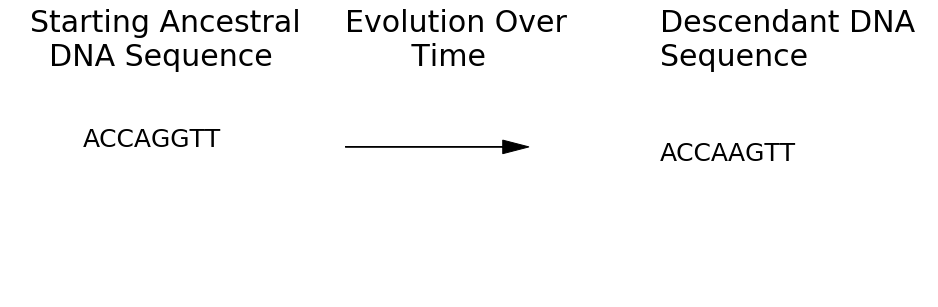

In [5]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.text(0.0,0.8,"Starting Ancestral\n  DNA Sequence",fontsize=30)
ax1.text(0.2,0.5,"ACCAGGTT",fontsize=25)

ax2.text(0.0,0.8,"Evolution Over\n       Time",fontsize=30)

ax2.arrow(0,0.5,0.6,0.0,head_width=0.05, head_length=0.1, fc='k', ec='k')

ax3.text(0.0,0.8,"Descendant DNA\nSequence",fontsize=30)
ax3.text(0.0,0.45,"ACCAAGTT",fontsize=25)

ax1.axis("Off"),ax2.axis("Off"),ax3.axis("Off")
plt.show()

Let us perform a sequence alignment between the ancestral DNA sequence and the first descendant from top to bottom.

Use the slider to change the position in the alignment that we are focusing on. 


In [6]:
def ancestral(value):
    S1 = "ACCAGGTT"
    S2 = "ACCAAGTT"
    fig = plt.figure(figsize=(16,5))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
#     ax1.set_title("Ancestral DNA\n Sequence",fontsize=30)
#     ax2.set_title("Descendant DNA\n Sequence",fontsize=30)
    ax2.text(0.0,1.0,"Ancestral DNA\n    Sequence",fontsize=30)
    ax2.text(0.0,0.2,"Descendant DNA\n    Sequence",fontsize=30)
    ax1.set_xticklabels([]),ax1.set_yticklabels([])
    ax2.set_xticklabels([]),ax2.set_yticklabels([])
    ax3.set_xticklabels([]),ax3.set_yticklabels([])
    ax1.axis("Off"),ax2.axis("Off"),ax3.axis("Off")
    
    for i in range(len(S1)):
        ax2.text(i/10,0.8,S1[i],fontsize=30)
        ax2.text(i/10,0.7,"|",fontsize=30)
        ax2.text(i/10,0.6,S2[i] ,fontsize=30)

#     ax1.text(0.4,0.8,"S1",fontsize=30)
#     ax1.text(0.4,0.6,"S2" ,fontsize=30)
    
    ax2.text(value/10,0.8,S1[value],fontsize=30,color='red')
    ax2.text(value/10,0.6,S2[value],fontsize=30,color='red')
    
    if S1[value]==S2[value]:
        ax3.text(0.5,0.65,"Perfect\nmatch",fontsize=30)
    else:
        ax3.text(0.5,0.65,"Bases\ndiffer",fontsize=30)

    plt.show()
style = {'description_width': 'initial'}    
interact(ancestral,value=widgets.IntSlider(value=0,
            min=0,
            max=7,
            step=1,
            description='Position in alignment',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
));

interactive(children=(IntSlider(value=0, continuous_update=False, description='Position in alignment', max=7, style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

**Assignment 1**

In what position in the sequence alignment did the substitution take place?

In [7]:
from ipywidgets import interact_manual,widgets,interact


s = {'description_width': 'initial'}        
@interact(answer =widgets.Select(
                    options=["Select option","1",\
                            "4","2",\
                             "0"],
                    value='Select option',
                    description="Position in sequence",
                    disabled=False,
                    style=s
))

def reflective_angle_question(answer):
    if answer=="Select option":
        print("Click on the correct position within the sequence alignment.\n")
    
    elif answer=="4":
        print("Correct!")
    elif answer != "4" or answer != "Select Option":
        print("Hint: Where do the bases differ in the sequence alignment? Use the slider to help you find the answer")

interactive(children=(Select(description='Position in sequence', options=('Select option', '1', '4', '2', '0'), style=DescriptionStyle(description_width='initial'), value='Select option'), Output()), _dom_classes=('widget-interact',))


---

<h2 align='center'>Example of a deletion/insertion</h2>

We take the same ancestral DNA sequence as before and observe the following two descendants. Notice how the length of the descendants is different. 

Answer the following assignments and verify with the help of buttons.


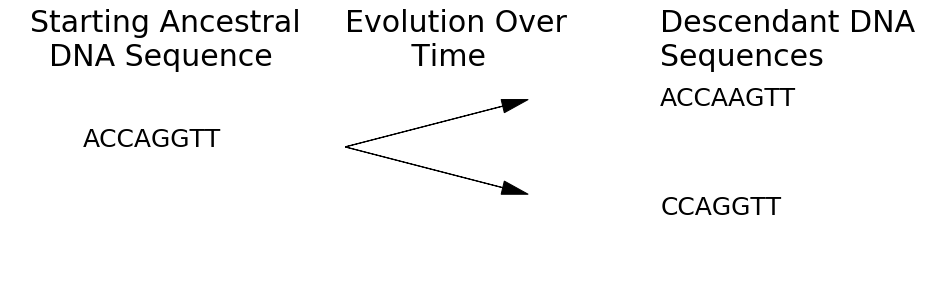

In [8]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.text(0.0,0.8,"Starting Ancestral\n  DNA Sequence",fontsize=30)
ax1.text(0.2,0.5,"ACCAGGTT",fontsize=25)

ax2.text(0.0,0.8,"Evolution Over\n       Time",fontsize=30)
ax2.arrow(0,0.5,0.6,0.15,head_width=0.05, head_length=0.1, fc='k', ec='k')
ax2.arrow(0,0.5,0.6,-0.15,head_width=0.05, head_length=0.1, fc='k', ec='k')

ax3.text(0.0,0.8,"Descendant DNA\nSequences",fontsize=30)
ax3.text(0.0,0.65,"ACCAAGTT",fontsize=25)
ax3.text(0.0,0.25,"CCAGGTT",fontsize=25)

ax1.axis("Off"),ax2.axis("Off"),ax3.axis("Off")
plt.show()

**Assignment 2**

Compare the length of the starting DNA sequence and the second of the three new sequences that result from evolution over time. 

What is the length of the starting ancestral DNA sequence?

$$ACCAGGTT$$

In [9]:
ai_button_len = widgets.Button(button_style='info',description="Verify Length", layout=Layout(width='25%', height='30px') )
ai_button_len.on_click( run_current )
len_count = 0

In [10]:
len_count +=1
display(ai_button_len)

if len_count>=2:
    print("Length of sequence is:")
    print(len("ACCAGGTT"))

Button(button_style='info', description='Verify Length', layout=Layout(height='30px', width='25%'), style=ButtonStyle())

What is the length of the second new DNA sequence?

$$ACCAGGTTT$$

In [11]:
len_count = 0

In [12]:
len_count +=1
display(ai_button_len)

if len_count>=2:
    print("Length of sequence is:")
    print(len("ACCATGTTT"))

Button(button_style='info', description='Verify Length', layout=Layout(height='30px', width='25%'), style=ButtonStyle())

We observe that the length of the new DNA sequence is longer than the length of the ancestral DNA sequence. This means an **insertion** has taken place. 

We can perform a sequence aligment of the ancestral DNA sequence $$ACCAGGTT$$

and the new DNA sequence $$ACCAGGTTT$$

by using a table and inserting an indel "-" so that the lengths of the two sequences are the same.

|Sequence Type|DNA Sequence|
|-------------|-------------|
|Ancestral    |$\text{ }\text{ }\text{ }-ACCAGGTT$|
|New    |$ACCAGGTTT$|

This gives rise to a question: 

<h3 align='center'>Where in the descendant DNA sequence did the insertion take place?</h3>

Use the interactive widget below to place the indel in different places within the alignment. Generate hypothesis about where in the alignment it would make the most sense. There is not a unique answer to this assignment. 

In [13]:
def demo_indel_in(value):
    fig = plt.figure(figsize=(16,5))
    S1 = ["A","C","C","A","G","G","T","T"]
    S2 = ["A","C","C","A","G","G","T","T","T"]
    S3 = ["C","C","A","G","G","T","T","T"]
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    #ax1.set_title("Sequence",fontsize=30)
    #ax2.set_title("DNA Sequence",fontsize=30)
    ax1.set_xticklabels([]),ax1.set_yticklabels([])
    ax2.set_xticklabels([]),ax2.set_yticklabels([])
    
    ax3.set_xticklabels([]),ax3.set_yticklabels([])
    ax1.axis("Off"),ax2.axis("Off"),ax3.axis("Off")
    
    indel= "-"
    
    #S1[0:value] + S1[value:-1]
     
    
    S1.insert(value, indel)

    for i in range(len(S1)):
        ax2.text(i/10,0.8,S1[i],fontsize=25)
        ax2.text(i/10,0.7,"|",fontsize=30)
    
    for i in range(len(S2)):
        ax2.text(i/10,0.6,S2[i],fontsize=25)
        

    ax2.text(0.0,1.0,"Ancestral DNA\n   Sequence",fontsize=30)
    ax2.text(0.0,0.2,"Descendant DNA\n    Sequence" ,fontsize=30)
    
#     ax2.text(value/10,0.8,S1[value],fontsize=30,color='red')
#     ax2.text(value/10,0.6,S2[value],fontsize=30,color='red')
    
#     if S1[value]==S2[value]:
#         ax3.text(0.5,0.7,"Perfect\nmatch\n\nAdd 1",fontsize=30)
#     else:
#         ax3.text(0.5,0.7,"Bases\ndiffer\n\nAdd 0",fontsize=30)

    plt.show()
style = {'description_width': 'initial'}    
interact(demo_indel_in,value=widgets.IntSlider(value=0,
            min=0,
            max=8,
            step=1,
            description='Indel Position Ancestral DNA',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
));

interactive(children=(IntSlider(value=0, continuous_update=False, description='Indel Position Ancestral DNA', max=8, style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

Use the box below to enter the base and position in the descendant sequence which you think was inserted. Press the Record Answer button when you have finished. 

In [14]:
from ipywidgets import widgets as w
from ipywidgets import Button, Layout
from IPython.display import display, Javascript, Markdown

def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))   
style = {'description_width': 'initial'}


emma1_text = w.Textarea( value='', placeholder='Write your answer here. Press Record Answer when you finish.', description='', disabled=False , layout=Layout(width='100%', height='75px') )
emma1_button = w.Button(button_style='info',description="Record Answer", layout=Layout(width='15%', height='30px'))

display(emma1_text)
display(emma1_button)

emma1_button.on_click( rerun_cell ) 

Textarea(value='', layout=Layout(height='75px', width='100%'), placeholder='Write your answer here. Press Record Answer when you finish.')

Button(button_style='info', description='Record Answer', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

In [15]:
emma1_input = emma1_text.value

if(emma1_input != ''):
    
    #emma1_text.close()
    #emma1_button.close()
    display(Markdown("### Your answer for Assignment 2"))
    display(Markdown(emma1_input))

**Assignment 3**

Compare the length of the starting DNA sequence and the third of the three new sequences that result from evolution over time. 

What is the length of the starting ancestral DNA sequence?

$$ACCAGGTT$$

In [16]:
ai_button_len = widgets.Button(button_style='info',description="Verify Length", layout=Layout(width='25%', height='30px') )
ai_button_len.on_click( run_current )
len_count = 0

In [17]:
len_count +=1
display(ai_button_len)

if len_count>=2:
    print("Length of sequence is:")
    print(len("ACCAGGTT"))

Button(button_style='info', description='Verify Length', layout=Layout(height='30px', width='25%'), style=ButtonStyle())

What is the length of the third new DNA sequence?

$$CCAGGTT$$

In [18]:
len_count = 0

In [19]:
len_count +=1
display(ai_button_len)

if len_count>=2:
    print("Length of sequence is:")
    
    print(len("CCAAGTT"))


Button(button_style='info', description='Verify Length', layout=Layout(height='30px', width='25%'), style=ButtonStyle())

We observe that the length of the new DNA sequence is shorter the length of the ancestral DNA sequence. This means a **deletion** has taken place. 

by using a table and inserting an indel "-" so that the lengths of the two sequences are the same.

|Sequence Type|DNA Sequence|
|-------------|-------------|
|Ancestral    |$ACCAGGTT$|
|New    |$ACCAGTT-$|

This gives rise to a question: 

<h3 align='center'>Where in the ancestral DNA sequence did the deletion take place?</h3>


Use the widget below to delete bases from the bottom new DNA sequence. 

Which base was deleted?

In [20]:
def demo_indel_del(value):
    fig = plt.figure(figsize=(16,5))
    S1 = ["A","C","C","A","G","G","T","T"]
    S2 = ["A","C","C","A","G","G","T","T","T"]
    S3 = ["C","C","A","G","G","T","T"]
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    ax1.set_xticklabels([]),ax1.set_yticklabels([])
    ax2.set_xticklabels([]),ax2.set_yticklabels([])
    
    ax3.set_xticklabels([]),ax3.set_yticklabels([])
    ax1.axis("Off"),ax2.axis("Off"),ax3.axis("Off")
    
    indel= "-"
    
     
    
    S3.insert(value,indel)

    for i in range(len(S1)):
        ax2.text(i/10,0.8,S1[i],fontsize=30)
        ax2.text(i/10,0.7,"|",fontsize=30)
    
    for i in range(len(S3)):
        ax2.text(i/10,0.55,S3[i],fontsize=30)
        

    ax2.text(0.0,1.0,"Ancestral DNA\n    Sequence",fontsize=30)
    ax2.text(0.0,0.2,"Descendant DNA\n      Sequence" ,fontsize=30)


    plt.show()
style = {'description_width': 'initial'}    
interact(demo_indel_del,value=widgets.IntSlider(value=7,
            min=0,
            max=7,
            step=1,
            description='Indel Position Ancestral DNA',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
));

interactive(children=(IntSlider(value=7, continuous_update=False, description='Indel Position Ancestral DNA', max=7, style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

Use the box below to enter the base and position in the ancestral sequence which you think was deleted. Press the Record Answer button when you have finished. 

In [21]:
from ipywidgets import widgets as w
from ipywidgets import Button, Layout
from IPython.display import display, Javascript, Markdown

def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))   
style = {'description_width': 'initial'}


emma2_text = w.Textarea( value='', placeholder='Write your answer here. Press Record Answer when you finish.', description='', disabled=False , layout=Layout(width='100%', height='75px') )
emma2_button = w.Button(button_style='info',description="Record Answer", layout=Layout(width='15%', height='30px'))

display(emma2_text)
display(emma2_button)

emma2_button.on_click( rerun_cell ) 

Textarea(value='', layout=Layout(height='75px', width='100%'), placeholder='Write your answer here. Press Record Answer when you finish.')

Button(button_style='info', description='Record Answer', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

In [22]:
emma2_input = emma2_text.value

if(emma2_input != ''):
    
    #emma1_text.close()
    #emma1_button.close()
    display(Markdown("### Your answer for Assignment 3"))
    display(Markdown(emma2_input))

<h2 align='center'>Multiple Sequence Alignment</h2>

Now that we are a bit more comfortable with comparing two sequences via a sequence alignment, we can take a step further and begin comparing more than two sequences at a time. This is known as a "multiple sequence alignment" or MSA. 

In the previous exercises, we compared two sequences at a time, using ancestral DNA sequences as reference (or ground truth) and descendant DNA sequence as test alignment, with the purpose of generating different hypothesis. 

In reality, bioinformaticians do not have access to ancestral DNA sequences, only descendant DNA sequences. 

When bioinformaticians come accross a number of descendant DNA sequences from the same species, what they do is perform an MSA on the descendant DNA sequences and make hypothesis about what the ancestral DNA sequence was. The goal is to generate a hypothesis on what the common ancestors between a given number of genes are. 

Let's suppose we are given four gene sequences, and our job is to find common ancestors. We know the gene sequences belong to Butter clam (Saxidomus gigantea) found in B.C. and we wish to perform a MSA and generate hypothesis about what the common ancestors are. 

We are given the following information about the butter clam and the file 4_saxidomus_coi.fasta (you can find this file in the main page). 

Follow the rest of the notebook to find how we as bioinformaticians would go about generating hypothesis about common ancestors. 

**Assignment 4**

Read the excerpt below

<h2 align='center'>Clam Species in BC: Butter Clam</h2>


Saxidomus giganteus, or the butter clam, is a bivalve mollusk of the family Veneridae occuring along the Pacific coastline of North America from California to Alaska. Its shell measures on average three inches in length with light grey and white coloration and smooth ridges; inside its flesh is totally white. The butter clam can be found in the intertidal zone, usually buried to a depth of approximately one foot in sandy, gravelly, and mixed-shell substrate. Like most bivalves, it lives a sedentary lifestyle filter-feeding and consuming a diet of phyto-plankton. Unlike most bivalves, it has the ability to sequester paralytic shellfish poisons (PSTs) in its siphon and store them there for as long as two years, deterring any siphon-nipping predator. The butter clam is used for a variety of purposes, ranging from archaeological research to monitoring water pollution.

<img src="./images/Saxidomus_gigantea1sDLC2005.jpg" width=600px/> 

<h2 align='center'>Parsing sequence file formats</h2>

We begin this section by stating the following

<div class="alert alert-warning">
<font color="black"><b>Definition.</b> **FASTA format** is a text-based format for representing either nucleotide sequences or peptide sequences, in which base pairs or amino acids are represented using single-letter codes.  A sequence in FASTA format begins with a single-line description, followed by lines of sequence data. The description line is distinguished from the sequence data by a greater-than (">") symbol in the first column. It is recommended that all lines of text be shorter than 80 characters in length. $^{[2]}$
  </font>
</div>


**Assignment 5**

Go to the home menu and open the file "4_saxidomus_coi.fasta" found in the Gene_Sequences folder. 

In this file we find 4 gene sequences, each sequence starts with the symbol ">" followed by an **identifier**. 

This notebook is designed to help you manipulate the sequences in that file. 

Press the following button to display the identifier of each sequence.

In [23]:
#!pip install biopython --user

In [24]:
import sys

In [25]:
sys.path.append("/home/singcanada2018/.local/lib/python3.6/site-packages")

In [26]:
import Bio
from Bio import SeqIO

In [27]:
saxidomus_gigantea = "./4_saxidomus_coi.fasta"
fasta = "./fasta.fas"

In [28]:
seq_button_len = widgets.Button(button_style='info',description="Print Sequence Identifiers", layout=Layout(width='25%', height='30px') )
seq_button_len.on_click( run_current )
seq_count = 0

In [29]:
seq_count +=1
display(seq_button_len)

if seq_count>=2:
    record_iterator = SeqIO.parse(saxidomus_gigantea, "fasta")
    records = [record for record in record_iterator]
    for item in records:
        print(item.id)
    #print(len(item))
    #print(item.seq)
        print("\n")

Button(button_style='info', description='Print Sequence Identifiers', layout=Layout(height='30px', width='25%'), style=ButtonStyle())

Just as before, we are interested in learning what the length of each sequence is. 

Press the following button to print the length of each sequence. This button builds on top of the button above: we will see the id's we printed above along with the lengths of the sequences. 

In [30]:
th_button_len = widgets.Button(button_style='info',description="Print Sequence Lengths", layout=Layout(width='25%', height='30px') )
th_button_len.on_click( run_current )
th_count = 0

In [31]:
th_count +=1
display(th_button_len)

if th_count>=2:
    record_iterator = SeqIO.parse(saxidomus_gigantea, "fasta")
    records = [record for record in record_iterator]
    for item in records:
        print(item.id)
        print(len(item))
    #print(item.seq)
        print("\n")

Button(button_style='info', description='Print Sequence Lengths', layout=Layout(height='30px', width='25%'), style=ButtonStyle())

Next we want to take a look at the sequences. As before, we will build on the two applications above: we will display id, length and sequence. 

In [32]:
se_button_len = widgets.Button(button_style='info',description="Print Sequence Lengths", layout=Layout(width='25%', height='30px') )
se_button_len.on_click( run_current )
se_count = 0

In [33]:
se_count +=1
display(se_button_len)

if se_count>=2:
    record_iterator = SeqIO.parse(saxidomus_gigantea, "fasta")
    records = [record for record in record_iterator]
    for item in records:
        print(item.id)
        print(len(item))
        print(item.seq)
        print("\n")

Button(button_style='info', description='Print Sequence Lengths', layout=Layout(height='30px', width='25%'), style=ButtonStyle())

These are just like the DNA sequences we worked with in the first section of this notebook, the only difference being this is real and a much longer sequence. 

The natural step to take next is to perform a MSA of the four sequences in this file. 

We can do this manually, but one of the key components of bioinformatics is the use of software design to help bioinformaticians. 

Keep in mind that software is not perfect and it is common for errors to be introduced in the alignments. An important step following the MSA is to verify the alignment and make editions. Although this notebook does not provide insight into alignment edition, a reference is provided at the end of this section. 

---

</h3 align='center'>Performing a MSA using Clustal</h3>

Clustal $^{[3]}$ is a general purpose DNA or protein multiple sequence alignment program for three or more sequences. There are two ways we can can use Clustal:

1) Online https://www.ebi.ac.uk/Tools/msa/clustalo/


2) Via downloading the installation package and running from a terminal.

The advantages of the first option are that, of course you do not need to install nor run the softare via a terminal, however the online server is limited when you are working with a large number of sequences. 

This is advantage of the latter: it can handle a large number of sequences at a time. We will try both in this assignment. 
 

**Assignment 6**

The button below runs a multiple sequence alignment. Press the button found below. 

In [34]:
def run_next(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))    

al_button_len = widgets.Button(button_style='info',description="Perform MSA", layout=Layout(width='25%', height='30px') )
al_button_len.on_click( run_next )
display(al_button_len)

Button(button_style='info', description='Perform MSA', layout=Layout(height='30px', width='25%'), style=ButtonStyle())

In [35]:
!/home/singcanada2018/ClustalW/clustalw-2.1-linux-x86_64-libcppstatic/clustalw2 4_saxidomus_coi.fasta




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: KF643696.1   658 bp
Sequence 2: KF643744.1   658 bp
Sequence 3: KF644110.1   658 bp
Sequence 4: KF644144.1   658 bp
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  99
Sequences (1:3) Aligned. Score:  99
Sequences (1:4) Aligned. Score:  99
Sequences (2:3) Aligned. Score:  99
Sequences (2:4) Aligned. Score:  99
Sequences (3:4) Aligned. Score:  100
Guide tree file created:   [4_saxidomus_coi.dnd]

There are 3 groups
Start of Multiple Alignment

Aligning...
Group 1: Sequences:   2      Score:12502
Group 2: Sequences:   3      Score:12483
Group 3: Sequences:   4      Score:12470
Alignment Score 25460

CLUSTAL-Alignment file created  [4_saxidomus_coi.aln]



The above is output from Clustal. 

Go to the home page 

https://cybera.syzygy.ca/jupyter/user/singcanada2018/tree/SING

and open the file named "4_saxidomus_coi.aln"

This is the sequence alignment. 

**Assignment 7**

1. Go to https://www.ebi.ac.uk/Tools/msa/clustalo/

2. Select DNA

3. Choose the "4_saxidomus_coi.fasta" file

4. Press the "Submit" button. 

5. Compare your output with the output we obtained. 

<h2 align='center'>Phylogenetic Tree</h2>

Recall that we are interested in determining common ancestors of the genes we are working with. Our goal is to establish different hypothesis regarding the ancestors based on regions of similarity within our alignment. 

A phylogenetic tree allows us to establish models for such hypothesis.

Although we will not explore in detail how to construct a phylogenetic tree, we will use IQTree $^{[5]}$ along with its modelfinder feature $^{[5]}$ to find the best possible model for our sequences. 

**Assignment 8**

Press the button below to generate a phylogenetic tree for our butter clam DNA sequences. 

In [36]:
tree_button_len = widgets.Button(button_style='info',description="Generate Phylogenetic Tree", layout=Layout(width='25%', height='30px') )
tree_button_len.on_click( run_next )
display(tree_button_len)

Button(button_style='info', description='Generate Phylogenetic Tree', layout=Layout(height='30px', width='25%'), style=ButtonStyle())

In [37]:
!/home/singcanada2018/IQtree/iqtree-1.6.6-Linux/bin/iqtree -s /home/singcanada2018/SING/4_saxidomus_coi.aln

IQ-TREE multicore version 1.6.6 for Linux 64-bit built Jul  1 2018
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor,
Heiko Schmidt, Dominik Schrempf, Michael Woodhams.

Host:    8e4bb8d0cabd (AVX, 31 GB RAM)
Command: /home/singcanada2018/IQtree/iqtree-1.6.6-Linux/bin/iqtree -s /home/singcanada2018/SING/4_saxidomus_coi.aln
Seed:    701053 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Wed Aug  1 19:43:10 2018
Kernel:  AVX - 1 threads (8 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 8 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file /home/singcanada2018/SING/4_saxidomus_coi.aln ... Clustal format detected
Alignment most likely contains DNA/RNA sequences
Alignment has 4 sequences with 658 columns, 7 distinct patterns
2 parsimony-informative, 2 singleton sites, 654 constant sites
            Gap/Ambiguity  Composition  p-value
   1  KF644110.1    0.00% 

224  TIM3+F+G4     890.703      12  1805.407     1805.891     1859.277
225  TIM3+F+I+G4   890.712      13  1807.423     1807.988     1865.783
226  TIM3+F+R2     890.707      13  1807.413     1807.979     1865.773
227  TIM3+F+R3     890.706      15  1811.413     1812.160     1878.751
235  TVMe          939.443      9   1896.886     1897.164     1937.289
236  TVMe+I        939.442      10  1898.884     1899.224     1943.776
237  TVMe+G4       939.441      10  1898.882     1899.222     1943.774
238  TVMe+I+G4     939.446      11  1900.892     1901.301     1950.273
239  TVMe+R2       939.441      11  1900.883     1901.291     1950.264
240  TVMe+R3       939.440      13  1904.880     1905.445     1963.240
248  TVM+F         893.073      12  1810.147     1810.631     1864.017
249  TVM+F+I       893.072      13  1812.144     1812.710     1870.504
250  TVM+F+G4      893.071      13  1812.142     1812.707     1870.501
251  TVM+F+I+G4    893.076      14  1814.152     1814.805     1877.001
252  T

Press the button below to show the tree.

In [38]:
with open("./4_saxidomus_coi.aln.iqtree",'r') as f:
    tree = [line for line in f if "**" in line or "|" in line or "+-" in line]
f.close()

In [39]:
show_button_len = widgets.Button(button_style='info',description="Show Phylogenetic Tree", layout=Layout(width='25%', height='30px') )
show_button_len.on_click( run_next )
display(show_button_len)

Button(button_style='info', description='Show Phylogenetic Tree', layout=Layout(height='30px', width='25%'), style=ButtonStyle())

In [40]:
for line in tree:
    print(line)

+**KF644110.1

|

+**KF644144.1

|

|                             +**KF643696.1

+-----------------------------|

                              +----------------------------KF643744.1



<h2 align='center'>Observations</h2>

We see KF644144.1 and KF644110.1 in one branch. KF643696.1 in a separate branch and "KF643744.1" in a separate branch. 

**Question?**

What does this tell us about common ancestors?

To be explored next session...

<h2 align='center'>Conclusion</h2>

In this notebook we learned what a sequence is, as well as a what a sequence alignment and multiple sequence alignments are.

We performed an MSA on DNA sequences for butter clam and generated a phylogenetic tree. 

<h2 align='center'>References</h2>

https://inverts.wallawalla.edu/Mollusca/Bivalvia/Veneroida/Veneridae/Saxidomus_gigantea.html

[2] https://zhanglab.ccmb.med.umich.edu/FASTA/

[3] https://www.ebi.ac.uk/Tools/msa/clustalw2/

[4] Subha Kalyaanamoorthy, Bui Quang Minh, Thomas KF Wong, Arndt von Haeseler,
and Lars S Jermiin (2017) ModelFinder: Fast model selection for
accurate phylogenetic estimates. Nature Methods, 14:587–589.
https://doi.org/10.1038/nmeth.4285


[5] Lam-Tung Nguyen, Heiko A. Schmidt, Arndt von Haeseler, and Bui Quang Minh
(2015) IQ-TREE: A fast and effective stochastic algorithm for estimating
maximum likelihood phylogenies. Mol Biol Evol, 32:268-274.
https://doi.org/10.1093/molbev/msu300



<img src="./images/SING_Banner.png" width=600px/> 